### **Machine Learning Task - 2**

This notebook demonstrates the process of performing clustering analysis on a dataset. It includes steps to import necessary libraries, load the dataset, compute silhouette scores to evaluate clustering performance, and visualize the clusters. The focus is on determining the optimal number of clusters using silhouette scores and presenting the results through informative plots.

**Importing Libraries: This cell imports essential libraries like pandas and matplotlib for data analysis and visualization.**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

**Loading and Preprocessing Dataset: Loads a dataset from a specified file path and scale the data.**

In [38]:
# Load the data
data_file = 'Mall_Customers.csv'
data = pd.read_csv(data_file)

# Select features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Calculating Silhouette Scores: Computes silhouette scores to evaluate clustering quality.**

In [39]:
# Determine optimal clusters
sil_scores = []
cluster_range = range(2, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, cluster_labels)
    sil_scores.append(sil_score)

**Plotting Silhouette Scores: Visualizes the silhouette scores to assess different cluster numbers.**

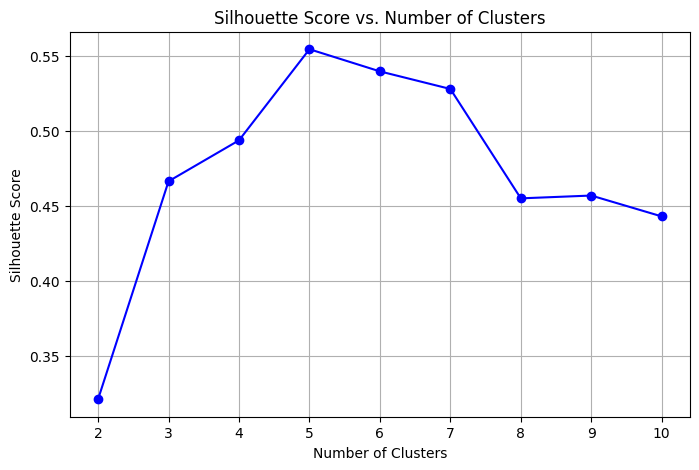

In [40]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**Determining Optimal Clusters: Identifies the optimal number of clusters based on silhouette analysis.**

In [41]:
# Optimal number of clusters
optimal_clusters = cluster_range[sil_scores.index(max(sil_scores))]

# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to data
data['Cluster'] = cluster_labels

**Plotting Clusters: Plots the data clusters without showing the centroids.**

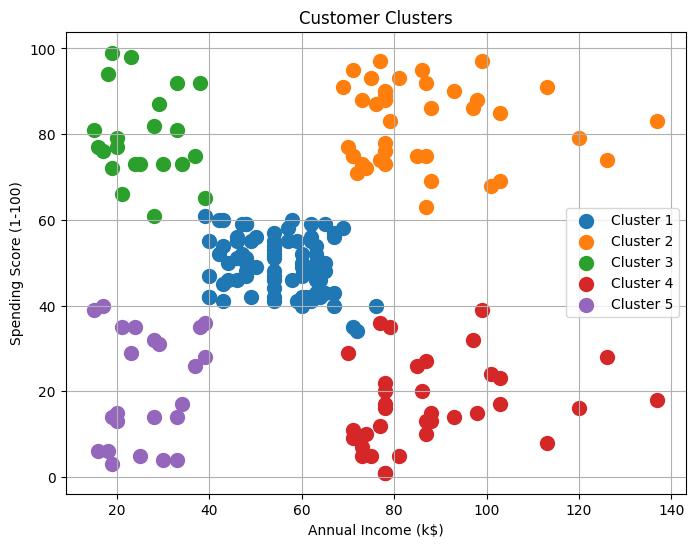

In [42]:
# Plot clusters without centroids
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(features.iloc[cluster_labels == i, 0], features.iloc[cluster_labels == i, 1], 
                s=100, label=f'Cluster {i+1}')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()